# Linear regression with one variable 

In this part of this exercise, we will implement linear regression with one
variable to predict profits for a food truck.

ex1data1.txt contains the dataset for our linear regression problem. 
The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for profit indicates a loss. 

#### First we will use `pandas` to read and exploar data :


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

dataset = pd.read_csv('ex1data1.txt', names=['population', 'profit'])
print(dataset.shape)
print(dataset.head())


(97, 2)
   population   profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233


# plotting the data 

Before starting on any task, it is often useful to understand the data by
visualizing it. For this dataset, you can use a scatter plot to visualize the
data, since it has only two properties to plot (profit and population).

####  we will use `matplotlib.pyplot` to plot data : 

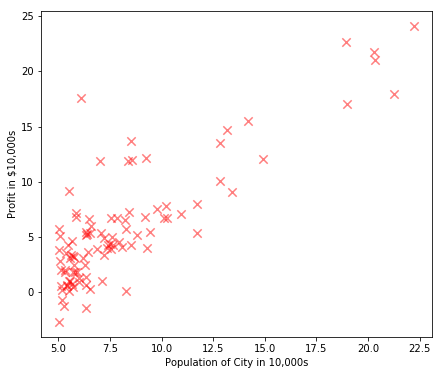

In [2]:
figure = plt.figure(figsize=(7, 6))
ax = figure.gca()
dataset.plot.scatter(x='population', y='profit',
                     ax=ax, color='r', marker='x', s=70, alpha=0.5)
ax.set_xlabel('Population of City in 10,000s')
ax.set_ylabel('Profit in $10,000s')
plt.show()

# Gradient Descent 

in this part we will implement gradient descent class 

it has two methods plus init to initialize the NO.iterations :

1- `fit` :
this method takes features, labels and alpha to optimize theta values 

These are the values you will adjust to minimize cost.

**first** we will add another dimension to our data to accommodate the
theta0 intercept term. We also initialize the initial parameters to 0 and the
learning rate alpha to 0.01.

**then** we will compute the cost 

J = (1 / 2m) ∑ (y' - y) ^ 2

m is the number of examples in our data 

y' is the predicted value 

**last step** we will use gradient in gradient descent to change theta values 

for each theta we will compute the cost and save it in j_history dictionary  

then we will iterate through j_history dictionary and choose theta values with the least cost function 

we will save it to make prediction ! 

2- `predict` 

this method predict the profit value for given population  



In [3]:
class GradientDescent:
    def __init__(self, iterations=1500):
        self.iter = iterations

    def fit(self, features, label, alpha=0.01, theta=None):
        
        # initialize theta values :
        if theta is None:
            theta = np.zeros((1, features.shape[1] + 1),
                             dtype='float64')
        else:
            theta = theta
        
        self.label = label 
        self.features = features
        self.alpha = alpha
       
        # add ones column to features
        x = np.concatenate([np.ones((self.features.shape[0],
                                     1),
                                    dtype='float64'),
                            features], axis=1)
        
        m = features.shape[0]

        def cost(x, m, label, theta):
            prediction = np.dot(x, theta.transpose())
            sqr_error = [(y_pre - y) ** 2 
                         for y_pre, y in zip(prediction, label)]
            J = (1 / (2 * m) * sum(sqr_error))
            return J[0]
        print(cost(x, m, label, theta))
        self.j_hist = {}
        for _ in range(self.iter):
            prediction = np.dot(x, theta.transpose())
            error = np.array([(y_pre - y)
                              for y_pre, y in zip(prediction, label)])
            gradient = np.dot(error.transpose(), x)
            theta = theta - alpha * (1 / m) * gradient
            j = cost(x, m, label, theta)
            self.j_hist[j] = theta
        
        min_j = min([i for i in self.j_hist])
        self.theta = self.j_hist[min_j]

    def predict(self, feature):
        self.feature = feature
        x = np.concatenate([np.ones((self.feature.shape[0],
                                     feature.shape[1]),
                                    dtype='float64'),
                            feature], axis=1)
        return np.dot(x, self.theta.transpose())

Now we will use the algorithm with our data 

**first** we will make numpy array for features and label using `np.array`

In [4]:
features = np.array(dataset['population']).reshape(-1, 1)
label = np.array(dataset['profit'])


now we will fit the model to data

**Note** we initialized alpha value with 0.01


In [5]:
gradient_descent = GradientDescent()
gradient_descent.fit(features, label)

32.072733877455654


**theta found by gradient descent:**

In [6]:
print(gradient_descent.theta)

[[-3.63029144  1.16636235]]


# plotting Training data with linear regression fit :

now we will plot training data with linear regression model to see how good it fits 

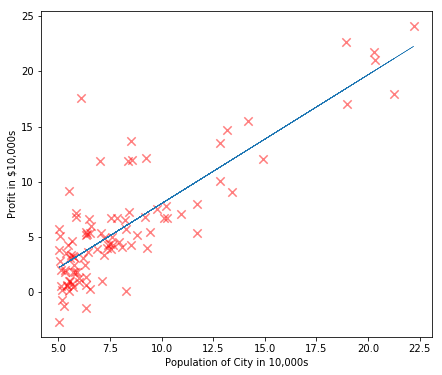

In [7]:
figure = plt.figure(figsize=(7, 6))
ax = figure.gca()
dataset.plot.scatter(x='population', y='profit',
                     ax=ax, color='r', marker='x', s=70, alpha=0.5)
ax.set_xlabel('Population of City in 10,000s')
ax.set_ylabel('Profit in $10,000s')
predictions = gradient_descent.predict(features)
ax.plot(features, predictions, linewidth=0.5)
plt.show()